In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf
from sklearn.preprocessing import minmax_scale
from math import log2, pow

import librosa
import librosa.display
import librosa.feature

In [25]:
freq = 2637 # set whatever frequency you want
sr = 16000 # sample rate / we have 16000 samples per second
T = 4.0 # seconds
t = np.linspace(0, T, int(T * sr), endpoint = False) # time variable
x = 0.5 * np.sin(2 * np.pi * freq * t) # pure sine wave at desired frequency (Hz)

sf.write('generated.wav', x, sr) # writing wave file in .wav format

In [26]:
#playing generated audio
ipd.Audio('generated.wav')# load a NumPy array

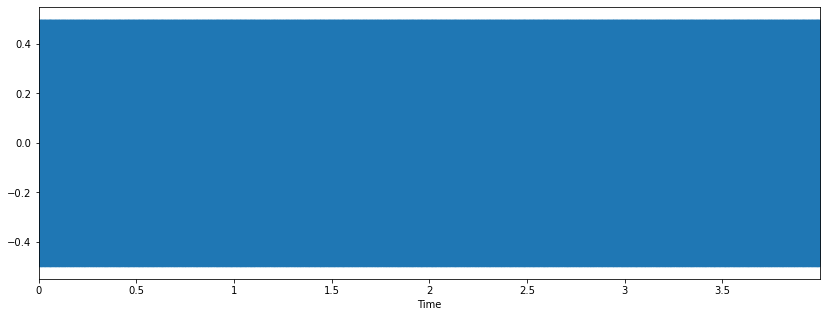

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

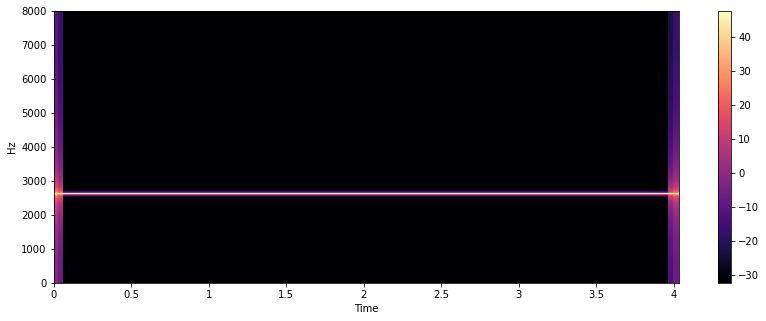

In [5]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [7]:
# pitch [0, 127] converted to frequency
def midi_pitch_to_frequency(d):
    return (2 ** ((d-69)/12.0))* 440.0

A4 = 440
C0 = A4 * pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(frequency):
    h = round(12*log2(frequency / C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)

#f = midi_pitch_to_frequency(100)
print("Frequency: ", freq)
print("Note: ", pitch(freq))

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)


Frequency:  2637
Note:  E7


In [ ]:
# 1. Our first audio clip has midi pitch value 100, which encodes the note E7. 
# 2. The note E7 has the fundamental frequency 2637 Hz.
# 3. The spectogram above has frequency ~2700 Hz most represented.

In [107]:
# 86k, mono, 8-bit, 22050 Hz, 4.0 seconds
audio_data = 'test.wav'
y, sr = librosa.load(audio_data, sr = 16000, duration = 4.0)
t = np.linspace(0, T, int(T * sr), endpoint = False)
ipd.Audio(audio_data)

In [92]:
# pitches, magnitudes = librosa.piptrack(y=y, sr=sr, fmin=0)
# def detect_pitch(y, sr, t):
#     index = magnitudes[:, t].argmax()
#     pitch = pitches[index, t]
#     return pitch
# detect_pitch(y, sr, 1)

521.864

Text(0, 0.5, 'Amplitude')

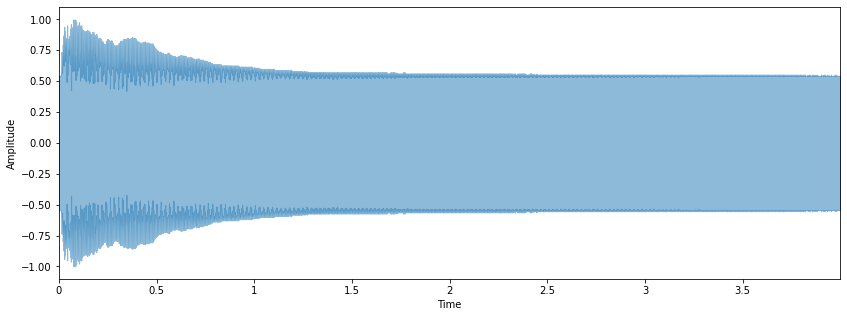

In [114]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.5)
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

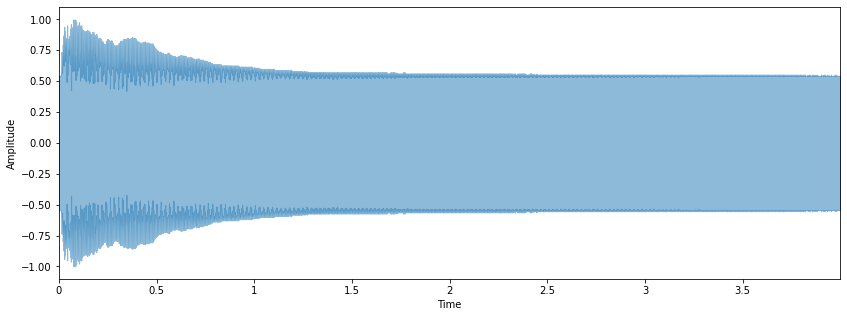

In [115]:
y = normalize(y)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.5)
plt.ylabel('Amplitude')

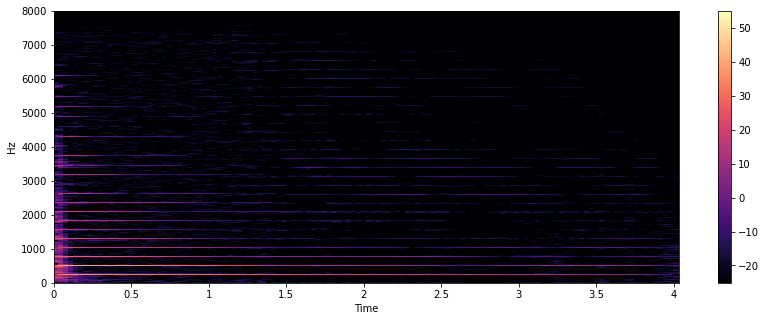

In [94]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

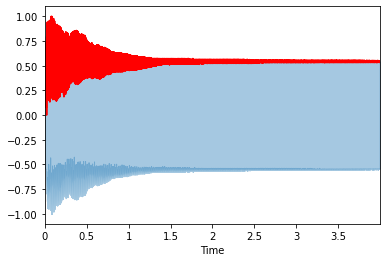

In [95]:
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(y), color='r')

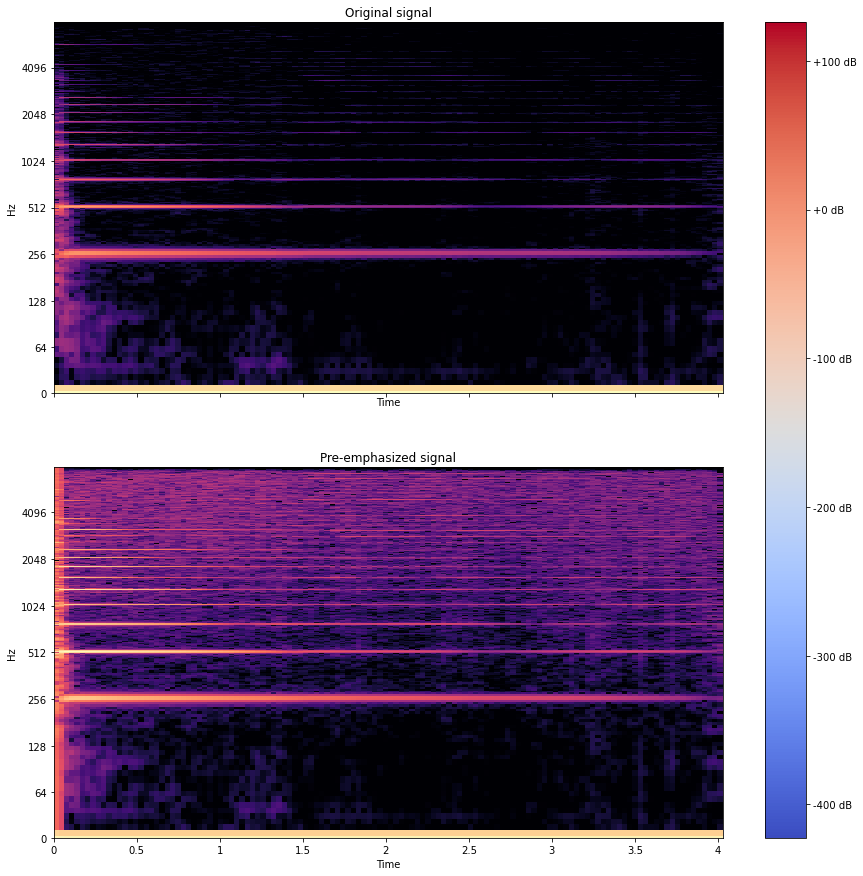

In [106]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,15))
y_filt = librosa.effects.preemphasis(y)
# plotting different results
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max)

librosa.display.specshow(S_orig, y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title = 'Original signal')

# Pre-Emphasis has to be done before feature extraction.  It will boost only the high-frequency
# components, while leaving all low-frequency components unchanged.
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title = 'Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'MFCC')]

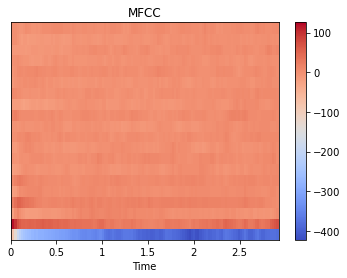

In [71]:
mfcc = librosa.feature.mfcc(y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')